In [1]:
%matplotlib inline
import os
import numpy as np
import re
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
reports = os.listdir('年报')
for report in reports:
    pdf = pdfplumber.open('年报\\' + report)
    f = open('reform'+'\\'+report[:-4]+'.txt', 'w', encoding='utf-8')
    for page in pdf.pages:
        text = page.extract_text()
        f.write(text)
    f.close()

In [3]:
reports = os.listdir('reform')
all_info = []
for report in reports:
    with open('reform\\' + report, 'r', encoding = 'utf-8') as f:
        data = f.read()
    f.close()
    data = data.replace(' ', '')
    info = {}
    info['公司名称'] = re.search('(.*?)有限公司', data).group(1)[:-2]
    info['股票简称'] = re.search('股票简称：?.*?(\w\w\w\w)', data).group(1)
    info['股票代码'] = re.search('股票代码：?.*?(\w\w\w\w\w\w)', data).group(1)
    info['公司的法定代表人'] = re.search('公司的法定代表人(.*?)\n', data).group(1)
    info['办公地址'] = re.search('办公地址(.*?)\n', data).group(1)
    info['公司网址'] = re.search('公司.*?网址(.*?)\n', data).group(1)
    info['电子信箱'] = re.search('电子信箱(.*?)\n', data).group(1)
    all_info.append(info)
df = pd.DataFrame(all_info)
display(df)

公司名称  股票简称    股票代码 公司的法定代表人                         办公地址  \
0    浙江伟星新型建材  伟星新材  002372      金红阳                   浙江省临海经济开发区   
1    北京君正集成电路  北京君正  300223       刘强  北京市海淀区西北旺东路10号院东区14号楼A座一至三层   
2    北方华创科技集团  北方华创  002371      赵晋荣           北京市北京经济技术开发区文昌大道8号   
3      华兰生物工程  华兰生物  002007       安康                河南省新乡市华兰大道甲1号   
4  河北四通新型金属材料  四通新材  300428      臧立国               保定市清苑区发展西街359号   
5   宁德时代新能源科技  宁德时代  300750       周佳            福建省宁德市蕉城区漳湾镇新港路2号   
6   成都新易盛通信技术  新易盛股  300502      高光荣            成都市双流区公兴镇物联西街127号   
7     深圳市方直科技  方直科技  300235      黄元忠        深圳市南山区大新路198号创新大厦B座9楼   
8     上海普丽盛包装  普丽盛股  300442      姜卫东             上海市金山区张堰镇金张支路84号   
9      江苏洋河酒厂  洋河股份  002304       王耀              江苏省宿迁市洋河中大街118号   

                         公司网址                         电子信箱  
0               www.vasen.com               wxxc@vasen.com  
1             www.ingenic.com        investors@ingenic.com  
2               www.naura.com             002371@naura.com  
3   http://www.hualanbio.com/         hualan@hualanbio.com  
4      http://www.stnm.com.cn             info@stnm.com.cn  
5         www.catlbattery.com      CATL-IR@catlbattery.com  
6           www.eoptolink.com             ir@eoptolink.com  
7          www.kingsunedu.com  kingsunsoft@kingsunsoft.com  
8              www.cn-pls.com               pls@cn-pls.com  
9  http://www.chinayanghe.com     yanghe002304@vip.163.com

In [4]:
incomes = []
for file in os.listdir('reform'):
    f = open('reform\\' + file, 'r', encoding='utf-8') 
    data = f.read()
    f.close
    data = data.replace(' ', '')    
    income = re.findall(r'营业收入（元）(.*?)\n', data)    
    income = " ".join(str(i) for i in income)
    incom1 = re.findall(r'\d*\,?\d*\,?\d*\,?\d+\.?\d\d', income)
    
    del incom1[2]        
    incom1.insert(0,re.search('(.*?)有限公司', data).group(1))
    incomes.append(incom1)
    

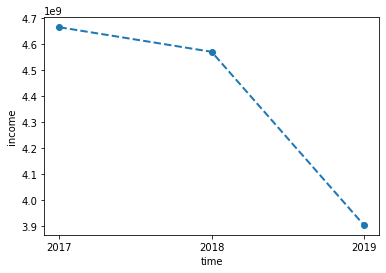

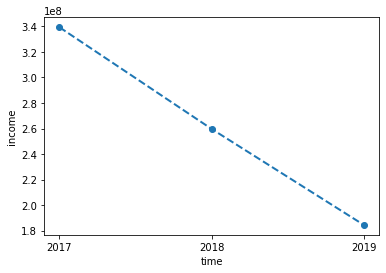

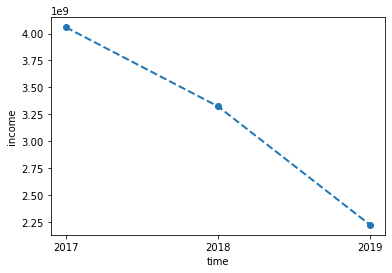

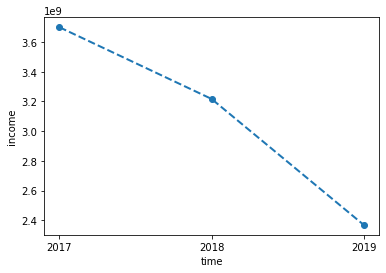

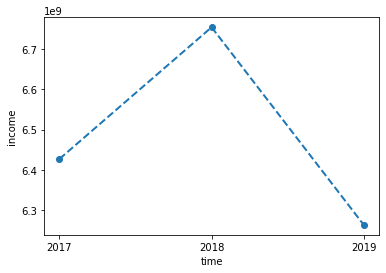

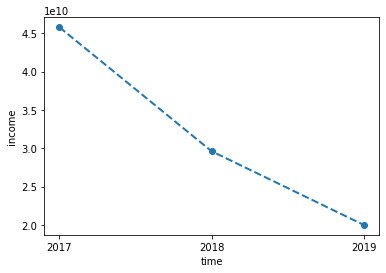

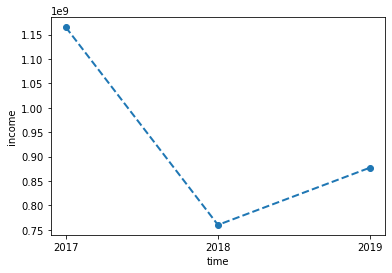

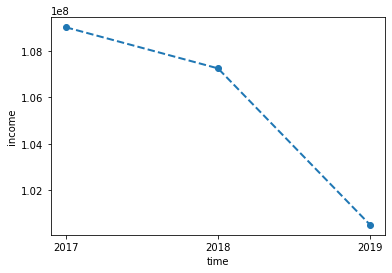

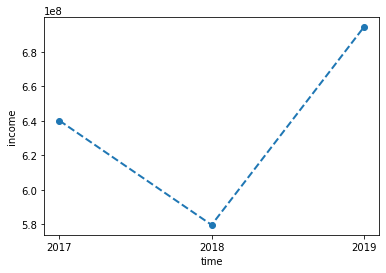

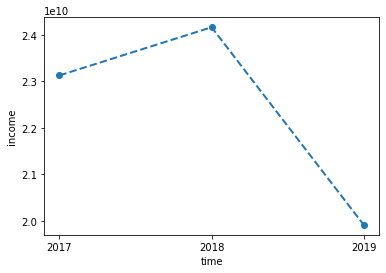

In [5]:
import numpy as np
y_data = []
for income in incomes:
    reformed_data = []
    for item in income[1:]:  
        reformed_data.append(item.replace(',', ''))
    reformed_data = list(map(float, reformed_data))
    y_data.append(reformed_data)

x_data = [2017, 2018, 2019]
for item in y_data:
    plt.plot(x_data, item, marker='o', linestyle='dashed', linewidth=2)
    plt.xlabel("time")
    plt.ylabel("income")
    x_stick = np.linspace(2017, 2019, 3)
    plt.xticks(x_stick)
    plt.show()


## 分析

本次实验一共选择十家公司从2017-2019的报表数据。总体趋势上，除了普丽盛外所有公司的营业收入均呈下降趋势。其中，伟星新材、北京君正、北方华创、华兰生物、宁德时代、方直科技这六家公司的营业收入在2017-2019年持续下降；四通新材、洋河股份的营业收入在2017-2018呈现上升趋势，但2018-2019年大幅下降；新易盛的营业收入在2017-2018明显下降，虽然2018-2019有所回升，但总体仍呈现明显下降状态。只有普丽盛的营业收入先降再升，总体呈上升趋势。由此可以推知，存在着近几年总体经济形式不佳的可能性，但具体结论有待分析更多公司数据。